In [1]:
PREFIX = './fragments/Frag1/'

In [2]:
import numpy
import PIL.Image

image = numpy.array(PIL.Image.open(f"{PREFIX}/ir.png")) / 255
print(image.min(), image.max(), image.shape)

mask = numpy.array(PIL.Image.open(f"{PREFIX}/mask.png"))
print(mask.min(), mask.max(), mask.shape)

target = numpy.array(PIL.Image.open(f"{PREFIX}/inklabels.png"))
print(target.min(), target.max(), target.shape)

0.396078431372549 1.0 (8181, 6330)
0 1 (8181, 6330)
0 1 (8181, 6330)


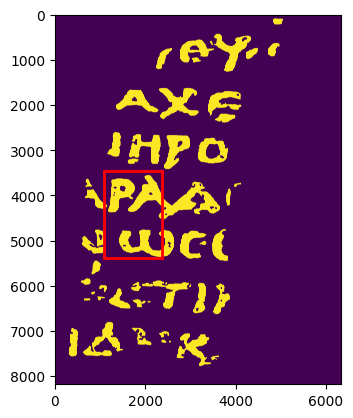

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

VAL_X = (1088, 2368)
VAL_Y = (3456, 5376)

plt.imshow(target)
plt.gca().add_patch(
    patches.Rectangle(
        (VAL_X[0], VAL_Y[0]),
        VAL_X[1] - VAL_X[0],
        VAL_Y[1] - VAL_Y[0],
        linewidth = 2,
        edgecolor = 'r',
        facecolor = 'none'
    )
)

In [4]:
WINDOW = 128
HALF = (WINDOW // 2)
PADDING = (WINDOW // 4)

train_images, train_labels, train_idxs = [], [], []
test_images, test_labels, test_idxs = [], [], []
for i in range(image.shape[0] - WINDOW):
    if i % HALF != 0:
        continue
    for j in range(image.shape[1] - WINDOW):
        if j % HALF != 0:
            continue
        if mask[i][j] == 0:
            continue

        img = image[i:i + WINDOW, j:j + WINDOW]
        label = target[i:i + WINDOW, j:j + WINDOW]

        if (i > VAL_Y[0]) and (i < VAL_Y[1]) and (j > VAL_X[0]) and (j < VAL_X[1]):
            test_images.append(img)
            test_labels.append(label)
            test_idxs.append((i, j))
        else:
            train_images.append(img)
            train_labels.append(label)
            train_idxs.append((i, j))

train_images = numpy.stack(train_images)
train_labels = numpy.stack(train_labels)
test_images = numpy.stack(test_images)
test_labels = numpy.stack(test_labels)

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(6521, 128, 128) (6521, 128, 128) (551, 128, 128) (551, 128, 128)


In [5]:
import torchvision.tv_tensors
import torchvision.transforms.v2

RESIZE_FACTOR = 2

WINDOW = WINDOW // RESIZE_FACTOR
HALF = (WINDOW // 2)
PADDING = (WINDOW // 4)

transform = torchvision.transforms.v2.Resize((WINDOW, WINDOW))

def resize(images, labels, idxs):
    images = torchvision.tv_tensors.Image(images)
    labels = torchvision.tv_tensors.Mask(labels)
    images, labels = transform(images, labels)
    idxs = [(i // RESIZE_FACTOR, j // RESIZE_FACTOR) for (i, j) in idxs]
    return images.numpy(), labels.numpy(), idxs

train_images, train_labels, train_idxs = resize(train_images, train_labels, train_idxs)
test_images, test_labels, test_idxs = resize(test_images, test_labels, test_idxs)

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(6521, 64, 64) (6521, 64, 64) (551, 64, 64) (551, 64, 64)


In [7]:
import cvtda.topology

extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = False, return_diagrams = False)
extractor = extractor.fit(train_images, f"{PREFIX}/train")
train_features = extractor.transform(train_images, f"{PREFIX}/train")
test_features = extractor.transform(test_images, f"{PREFIX}/test")

train_features.shape, test_features.shape

Calculating inverted images
GreyscaleExtractor: processing ./fragments/Frag1//train/greyscale, do_fit = True
Saving the result to ././fragments/Frag1//train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]


Saving the result to ././fragments/Frag1//train/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag1//train/greyscale, do_fit = False
Got the result from ././fragments/Frag1//train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag1//train/inverted_greyscale, do_fit = True


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]


Saving the result to ././fragments/Frag1//train/inverted_greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag1//train/inverted_greyscale, do_fit = False
Got the result from ././fragments/Frag1//train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 64x64: [12 25 38 51]x[12 25 38 51]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1/features.npy
Fitting filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1/features.npy
Fitting filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0/features.npy
Fitting filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0/features.npy
Fitting filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_12, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_12/features.npy
Fitting filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_25, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_25/features.npy
Fitting filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_38, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.82it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_38/features.npy
Fitting filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_51, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.13it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_51/features.npy
Fitting filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_12, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_12/features.npy
Fitting filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_25, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_25/features.npy
Fitting filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_38, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_38/features.npy
Fitting filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_51, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_51/features.npy
Fitting filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_12, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_12/features.npy
Fitting filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_25, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_25/features.npy
Fitting filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_38, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_38/features.npy
Fitting filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_51, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_51/features.npy
Fitting filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_12, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_12/features.npy
Fitting filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_25, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_25/features.npy
Fitting filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_38, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_38/features.npy
Fitting filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_51, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.89it/s]


Saving the result to ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_51/features.npy
Fitting filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1/features.npy
Fitting filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_-1/features.npy
Fitting filtration 28/72: 4/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_1, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_1/features.npy
Fitting filtration 29/72: 4/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_0_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_0_-1/features.npy
Fitting filtration 30/72: 4/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_0_1, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_0_1/features.npy
Fitting filtration 31/72: 4/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_0, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.90it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_0/features.npy
Fitting filtration 32/72: 4/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_0, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_0/features.npy
Fitting filtration 33/72: 4/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_12_12, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.33it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_12/features.npy
Fitting filtration 34/72: 4/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_12_25, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.77it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_25/features.npy
Fitting filtration 35/72: 4/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_12_38, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_38/features.npy
Fitting filtration 36/72: 4/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_12_51, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_12_51/features.npy
Fitting filtration 37/72: 4/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_25_12, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_12/features.npy
Fitting filtration 38/72: 4/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_25_25, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_25/features.npy
Fitting filtration 39/72: 4/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_25_38, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_38/features.npy
Fitting filtration 40/72: 4/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_25_51, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.83it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_25_51/features.npy
Fitting filtration 41/72: 4/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_38_12, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_12/features.npy
Fitting filtration 42/72: 4/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_38_25, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_25/features.npy
Fitting filtration 43/72: 4/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_38_38, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_38/features.npy
Fitting filtration 44/72: 4/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_38_51, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.89it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_38_51/features.npy
Fitting filtration 45/72: 4/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_51_12, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.81it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_12/features.npy
Fitting filtration 46/72: 4/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_51_25, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.85it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_25/features.npy
Fitting filtration 47/72: 4/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_51_38, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_38/features.npy
Fitting filtration 48/72: 4/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/RadialFiltration_51_51, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]


Saving the result to ././fragments/Frag1//train/filtrations/4/RadialFiltration_51_51/features.npy
Fitting filtration 49/72: 6/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 50/72: 6/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_1, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.58it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_1/features.npy
Fitting filtration 51/72: 6/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_-1/features.npy
Fitting filtration 52/72: 6/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_1, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_1/features.npy
Fitting filtration 53/72: 6/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_0_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.61it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_0_-1/features.npy
Fitting filtration 54/72: 6/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_0_1, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_0_1/features.npy
Fitting filtration 55/72: 6/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_0, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_-1_0/features.npy
Fitting filtration 56/72: 6/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_0, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.80it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/HeightFiltrartion_1_0/features.npy
Fitting filtration 57/72: 6/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_12_12, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_12/features.npy
Fitting filtration 58/72: 6/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_12_25, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_25/features.npy
Fitting filtration 59/72: 6/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_12_38, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.45it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_38/features.npy
Fitting filtration 60/72: 6/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_12_51, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_12_51/features.npy
Fitting filtration 61/72: 6/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_25_12, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.50it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_12/features.npy
Fitting filtration 62/72: 6/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_25_25, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_25/features.npy
Fitting filtration 63/72: 6/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_25_38, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_38/features.npy
Fitting filtration 64/72: 6/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_25_51, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.44it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_25_51/features.npy
Fitting filtration 65/72: 6/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_38_12, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_12/features.npy
Fitting filtration 66/72: 6/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_38_25, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.11it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_25/features.npy
Fitting filtration 67/72: 6/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_38_38, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_38/features.npy
Fitting filtration 68/72: 6/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_38_51, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_38_51/features.npy
Fitting filtration 69/72: 6/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_51_12, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:02<00:00,  4.35it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_12/features.npy
Fitting filtration 70/72: 6/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_51_25, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.96it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_25/features.npy
Fitting filtration 71/72: 6/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_51_38, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  3.82it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_38/features.npy
Fitting filtration 72/72: 6/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/6/RadialFiltration_51_51, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]


Saving the result to ././fragments/Frag1//train/filtrations/6/RadialFiltration_51_51/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Applying filtration 2/72: 2/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_12/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_25/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_38/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_51/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_12/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_25/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_38/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_51/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_12/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_25/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_38/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_51/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_12/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_25/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_38/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_51/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltr

GrayGeometryExtractor:   0%|          | 32/6521 [00:03<12:31,  8.64it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
GrayGeometryExtractor: 100%|██████████| 6521/6521 [01:14<00:00, 88.03it/s] 


Saving the result to ././fragments/Frag1//train/geometry/features.npy
Got the result from ././fragments/Frag1//train/geometry/features.npy
Applying StandardScaler.
Calculating inverted images
GreyscaleExtractor: processing ./fragments/Frag1//train/greyscale, do_fit = False
Got the result from ././fragments/Frag1//train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag1//train/inverted_greyscale, do_fit = False
Got the result from ././fragments/Frag1//train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/inverted_greyscale/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)
Go

d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_1/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_-1/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_0_1/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_-1_0/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/HeightFiltrartion_1_0/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_12/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_25/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_38/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_12_51/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_12/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_25/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_38/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_25_51/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_12/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_25/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_38/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_38_51/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_12/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_25/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_38/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/2/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/2/RadialFiltration_51_51/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_1/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//train/filtrations/4/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)
Got the result from ././fragments/Frag1//train/filtrations/4/HeightFiltr

DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]


Saving the result to ././fragments/Frag1//test/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag1//test/inverted_greyscale, do_fit = False
Saving the result to ././fragments/Frag1//test/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


Saving the result to ././fragments/Frag1//test/inverted_greyscale/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 181.89it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Applying filtration 2/72: 2/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 111.11it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_1/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.95it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_-1/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.90it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_1/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.92it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_0_-1/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 96.47it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_0_1/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.97it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_-1_0/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 153.87it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/HeightFiltrartion_1_0/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 151.19it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_12/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 143.59it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_25/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 88.68it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_38/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 166.73it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_12_51/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 181.15it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_12/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 85.08it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_25/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.98it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_38/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 148.99it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_25_51/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 163.81it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_12/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 85.89it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_25/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 87.74it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_38/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 88.74it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_38_51/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.96it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_12/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.95it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_25/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 87.79it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_38/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/2/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 153.74it/s]

Saving the result to ././fragments/Frag1//test/filtrations/2/RadialFiltration_51_51/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 169.90it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 83.19it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_1/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 82.99it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_-1/features.npy
Applying filtration 28/72: 4/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.41it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_1/features.npy
Applying filtration 29/72: 4/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 120.07it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_0_-1/features.npy
Applying filtration 30/72: 4/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 84.19it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_0_1/features.npy
Applying filtration 31/72: 4/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 89.97it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_-1_0/features.npy
Applying filtration 32/72: 4/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 145.15it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/HeightFiltrartion_1_0/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 170.31it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_12/features.npy
Applying filtration 34/72: 4/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 162.45it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_25/features.npy
Applying filtration 35/72: 4/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 91.38it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_38/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 83.88it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_12_51/features.npy
Applying filtration 37/72: 4/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 87.93it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_12/features.npy
Applying filtration 38/72: 4/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.46it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_25/features.npy
Applying filtration 39/72: 4/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.00it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_38/features.npy
Applying filtration 40/72: 4/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 137.87it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_25_51/features.npy
Applying filtration 41/72: 4/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 133.09it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_12/features.npy
Applying filtration 42/72: 4/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 172.24it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_25/features.npy
Applying filtration 43/72: 4/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 147.68it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_38/features.npy
Applying filtration 44/72: 4/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 83.67it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_38_51/features.npy
Applying filtration 45/72: 4/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 88.48it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_12/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 80.21it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_25/features.npy
Applying filtration 47/72: 4/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.97it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_38/features.npy
Applying filtration 48/72: 4/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/4/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 145.00it/s]

Saving the result to ././fragments/Frag1//test/filtrations/4/RadialFiltration_51_51/features.npy
Applying filtration 49/72: 6/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 35.67it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_-1/features.npy
Applying filtration 50/72: 6/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 30.77it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_1/features.npy
Applying filtration 51/72: 6/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 35.84it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_-1/features.npy
Applying filtration 52/72: 6/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 31.15it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_1/features.npy
Applying filtration 53/72: 6/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 41.22it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_0_-1/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 39.22it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_0_1/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 36.88it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_-1_0/features.npy
Applying filtration 56/72: 6/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 35.75it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/HeightFiltrartion_1_0/features.npy
Applying filtration 57/72: 6/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.64it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_12/features.npy
Applying filtration 58/72: 6/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.42it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_25/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 26.49it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_38/features.npy
Applying filtration 60/72: 6/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 28.87it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_12_51/features.npy
Applying filtration 61/72: 6/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 27.98it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_12/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 23.70it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_25/features.npy
Applying filtration 63/72: 6/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 27.74it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_38/features.npy
Applying filtration 64/72: 6/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 24.78it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_25_51/features.npy
Applying filtration 65/72: 6/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.48it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_12/features.npy
Applying filtration 66/72: 6/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.64it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_25/features.npy
Applying filtration 67/72: 6/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 24.10it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_38/features.npy
Applying filtration 68/72: 6/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 23.42it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_38_51/features.npy
Applying filtration 69/72: 6/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 28.38it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_12/features.npy
Applying filtration 70/72: 6/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 29.41it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_25/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 28.17it/s]

Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_38/features.npy
Applying filtration 72/72: 6/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag1//test/filtrations/6/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.52it/s]


Saving the result to ././fragments/Frag1//test/filtrations/6/RadialFiltration_51_51/features.npy


GrayGeometryExtractor: 100%|██████████| 551/551 [00:04<00:00, 119.60it/s]


Saving the result to ././fragments/Frag1//test/geometry/features.npy
Applying StandardScaler.


((6521, 7353), (551, 7353))

In [11]:
import cvtda.segmentation

cvtda.segmentation.segment(
    train_images, train_features, train_labels,
    test_images, test_features, test_labels,
    dump_name = f"{PREFIX}/predictions", remove_cross_maps = True
)

Trying no - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001710CA2F1F0>
Parameters: 42163945


100%|██████████| 100/100 [07:08<00:00,  4.28s/it, loss=138, lr=1e-5, Accuracy=0.645, AUC-ROC=0.498, Precision=0, Recall=0, F1-score=0, Jaccard score=0] 


Saving the result to ././fragments/Frag1//predictions/no.npy
{'model': 'Без признаков', 'Accuracy': 0.6449504097663339, 'AUC-ROC': 0.4983985254597936, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'Jaccard score': 0.0}
Trying images - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001710CA2F250>
Parameters: 42163945


100%|██████████| 100/100 [09:02<00:00,  5.43s/it, loss=25.3, lr=1e-5, Accuracy=0.977, AUC-ROC=0.997, Precision=0.968, Recall=0.966, F1-score=0.967, Jaccard score=0.936] 


Saving the result to ././fragments/Frag1//predictions/images.npy
{'model': 'Без топологических признаков', 'Accuracy': 0.9765111019736842, 'AUC-ROC': 0.996886214279079, 'Precision': 0.9680466459173563, 'Recall': 0.9657198836904569, 'F1-score': 0.9668818649910601, 'Jaccard score': 0.9358870319149837}
Trying topological - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001710CA2F310>
Parameters: 42163945


100%|██████████| 100/100 [10:41<00:00,  6.42s/it, loss=20.7, lr=1e-5, Accuracy=0.936, AUC-ROC=0.987, Precision=0.959, Recall=0.857, F1-score=0.905, Jaccard score=0.827] 


Saving the result to ././fragments/Frag1//predictions/topological.npy
{'model': 'Только топологические признаки', 'Accuracy': 0.9363781051497277, 'AUC-ROC': 0.9867685179008101, 'Precision': 0.9594108673543513, 'Recall': 0.8570678014750845, 'F1-score': 0.9053562553801819, 'Jaccard score': 0.8270784534511931}
Trying combined - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001710CA2F130>
Parameters: 42237673


100%|██████████| 100/100 [11:56<00:00,  7.16s/it, loss=20.4, lr=1e-5, Accuracy=0.977, AUC-ROC=0.997, Precision=0.968, Recall=0.966, F1-score=0.967, Jaccard score=0.936] 


Saving the result to ././fragments/Frag1//predictions/combined.npy
{'model': 'Комбинированные признаки', 'Accuracy': 0.9765221791345281, 'AUC-ROC': 0.9967340592620221, 'Precision': 0.9681460285445816, 'Recall': 0.9656462542586515, 'F1-score': 0.9668945256977128, 'Jaccard score': 0.935910756208808}


,model,Accuracy,AUC-ROC,Precision,Recall,F1-score,Jaccard score
0,Без признаков,0.644950,0.498399,0.000000,0.000000,0.000000,0.000000
1,Без топологических признаков,0.976511,0.996886,0.968047,0.965720,0.966882,0.935887
2,Только топологические признаки,0.936378,0.986769,0.959411,0.857068,0.905356,0.827078
3,Комбинированные признаки,0.976522,0.996734,0.968146,0.965646,0.966895,0.935911


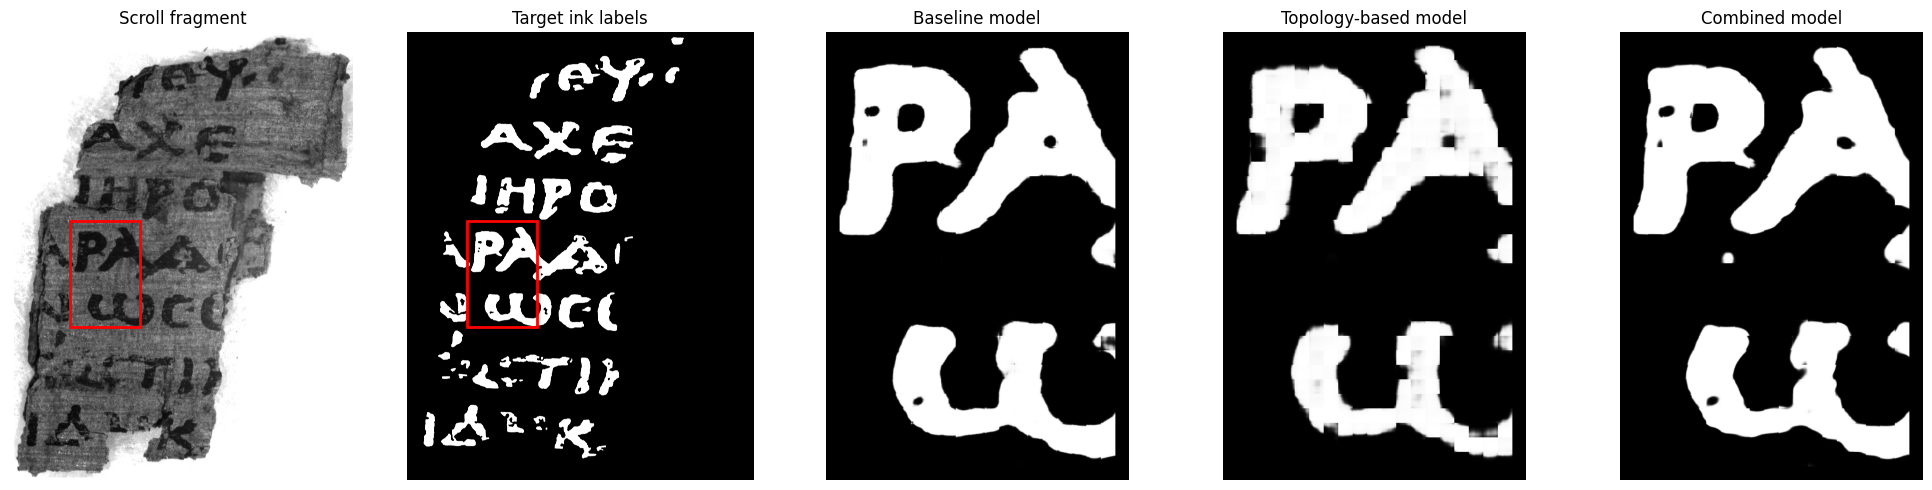

In [25]:
import numpy
import matplotlib.pyplot as plt

def restore(imgs, idxs, ax):
    restored = numpy.zeros((image.shape[0] // RESIZE_FACTOR, image.shape[1] // RESIZE_FACTOR))

    x0, x1, y0, y1 = 1e9, 0, 1e9, 0
    for img, (i, j) in zip(imgs, idxs):
        i_from, i_to = i + PADDING, i + WINDOW - PADDING
        j_from, j_to = j + PADDING, j + WINDOW - PADDING
        img_part = img[PADDING:-PADDING, PADDING:-PADDING]
        restored[i_from:i_to, j_from:j_to] = img_part

        x0, x1 = min(x0, i_from), max(x1, i_to)
        y0, y1 = min(y0, j_from), max(y1, j_to)

    diff = min((int)((x1 - x0) * 0.05), (int)((y1 - y0) * 0.05))
    ax.imshow(restored[x0 - diff:x1 + diff, y0 - diff:y1 + diff], cmap = 'gray')

fig, axes = plt.subplots(1, 5, figsize = (20, 5))

axes[0].axis('off')
axes[0].set_title("Scroll fragment")
axes[0].imshow(image, cmap = 'gray')
axes[0].add_patch(patches.Rectangle((VAL_X[0], VAL_Y[0]), VAL_X[1] - VAL_X[0], VAL_Y[1] - VAL_Y[0], linewidth = 2, edgecolor = 'r', facecolor = 'none'))

axes[1].axis('off')
axes[1].set_title("Target ink labels")
axes[1].imshow(target, cmap = 'gray')
axes[1].add_patch(patches.Rectangle((VAL_X[0], VAL_Y[0]), VAL_X[1] - VAL_X[0], VAL_Y[1] - VAL_Y[0], linewidth = 2, edgecolor = 'r', facecolor = 'none'))

axes[2].axis('off')
axes[2].set_title("Baseline model")
restore(numpy.squeeze(numpy.load(f'{PREFIX}/predictions/images.npy')), test_idxs, axes[2])

axes[3].axis('off')
axes[3].set_title("Topology-based model")
restore(numpy.squeeze(numpy.load(f'{PREFIX}/predictions/topological.npy')), test_idxs, axes[3])

axes[4].axis('off')
axes[4].set_title("Combined model")
restore(numpy.squeeze(numpy.load(f'{PREFIX}/predictions/combined.npy')), test_idxs, axes[4])

fig.tight_layout()
fig.savefig(f"{PREFIX}/predictions/display.svg")